# Shape Gen Graph Generative Models

## Enviroments

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

### Tensorboard

## Tensorboard

First we need install a tensorboard, so we can track a progress and generation.


In [ ]:
#docker run -it -p 8888:8888 -p 6006:6006 \
#tensorflow/tensorflow:nightly-py3-jupyter

### Git

The shape gen abstract model and trainer,  please git clone a repo. When you done expand folder structure, it container all source code.

In [2]:
!git clone https://github.com/spyroot/shapenet
%cd shapenet
!ls

fatal: destination path 'shapenet' already exists and is not an empty directory.
/content/shapenet
config.yaml	  LICENSE    requirements.txt  start_tensorboard.sh
generative.ipynb  main.py    setup.py
__init__.py	  README.md  shapegnet


In [ ]:
!apt-get update
!apt install software-properties-common
!apt-get upgrade
!apt install -y build-essential zlib1g-dev libncurses5-dev libgdbm-dev libnss3-dev libssl-dev libreadline-dev libffi-dev libsqlite3-dev wget libbz2-dev
!pip3 install --upgrade pip
!apt install python3.8
!apt install python3-pip
!apt-get install -y python3-dev
!apt-get install -y python3.8-dev
!apt-get install -y libpython3.8-dev
!pip3 install docutils
!pip3 install pygments
!pip3 install twine
!pip3 install wheel
!pip3 install pyemd
!pip3 install rich
!pip3 install python-louvain

In [ ]:
!update-alternatives --install /usr/bin/python3 python /usr/bin/python3.8 1
!update-alternatives --list python3
!sudo update-alternatives --config python3
!apt install python3-pip
!python -m pip install --upgrade pip
!python3 -m pip install --upgrade pip
!python --version
!pip3 --version

In [ ]:
!pip3 install networkx==2.6.3
!pip3 install zict==2.0.0
!pip3 install pyemd
!pip3 install yaml
!pip3 install pandas~=1.3.4
!pip3 install tqdm~=4.62.3
!pip3 install pydot
!pip3 install pyvista==0.32.1
!pip3 install pyviz-comms==2.1.0
!pip3 install fvcore
!pip3 install pickleshare
!pip3 install protobuf
!pip3 install vtk
!pip3 install PyYAML
!pip3 install torch==1.10.0 -f https://data.pyg.org/whl/torch-1.10.0+cu112.html
!pip3 install torchaudio==0.10.0 -f https://data.pyg.org/whl/torch-1.10.0+cu112.html
!pip3 install torchvision==0.11.1 -f https://data.pyg.org/whl/torch-1.10.0+cu112.html
!pip3 install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu112.html
!pip3 install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu112.html
!pip3 install torch-geometric
!pip3 install tensorboard
!pip3 matplotlib==3.4.3
!pip3 matplotlib-inline==0.1.3
!pip3 install scikit-learn
!pip3 install scipy
!pip3 install scooby
!pip3 install seaborn
!pip3 install pyyaml
!pip3 install networkx==2.6.3
!pip3 install zict==2.0.0
!pip3 install pyemd
!pip3 install yaml
!pip3 install pyyaml
!pip3 install pandas
!pip3 install tqdm~=4.62.3
!pip3 install pydot
!pip3 install pyvista==0.32.1
!pip3 install pyviz-comms==2.1.0
!pip3 install fvcore
!pip3 install pickleshare
!pip3 install protobuf
!pip3 install vtk
!pip3 install PyYAML
!pip3 install torch-geometric
!pip3 matplotlib
!pip3 matplotlib-inline
!pip3 install scikit-learn
!pip3 install scipy
!pip3 install scooby
!pip3 install seaborn
!python -c "import torch; print(torch.version.cuda)"

# widges fix
!pip3 install tqdm
!pip3 install ipywidgets 
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

### GPU

We really need GPU to train this models

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

!nvcc --version
!python -c "import torch; print(torch.version.cuda)"
!python3 -c "import torch; print(torch.version.cuda)"

Mon Dec  6 01:51:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Graph Encoder and Decoder


array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 0., 0., 0., 1., 0.]])

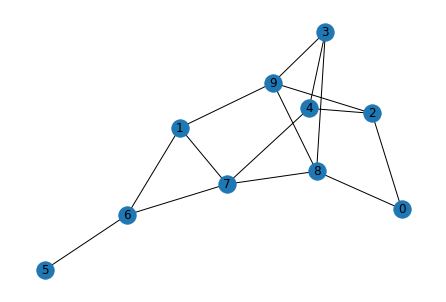

In [2]:
import networkx as nx
import numpy as np
import torch.utils as tutil

np.random.seed(1234)

random_graph = nx.erdos_renyi_graph(10, 0.4)
original_graph = nx.to_numpy_array(random_graph)
nx.draw(random_graph, with_labels=True)
original_graph

## Encoder
 
 Let create test encoder and encoder our random graph first.

In [3]:
from shapegnet.models.adjacency_encoder import AdjacencyEncoder
encoder = AdjacencyEncoder()
encoded_adj = encoder.encode(original_graph.copy(), 10)
encoded_adj

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 0., 0.]])

## Decoder 

Now let's decode our graph back and visualize it and verify 
that we don't have any strange issues.

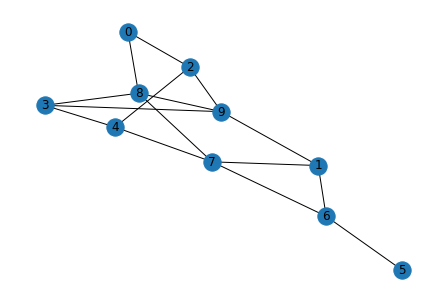

In [4]:
from shapegnet.models.adjacency_decoder import AdjacencyDecoder
decoder = AdjacencyDecoder()
decoded = decoder.decode(encoded_adj)
decoded
decoded_graph = nx.from_numpy_array(decoded, create_using=nx.MultiGraph)
nx.draw(decoded_graph, with_labels=True)

## Metric Computation
Now let compute metric between two graph in simular way as it describe in GraphRNN
and NetGAN paper

In [5]:
from shapegnet.external.stats import degree_stats, clustering_stats, orbit_stats_all
mmd_degree = degree_stats([random_graph], [decoded_graph])
mmd_degree
# This two computation are heavy and I ported C++ code but for now it suffice
# to understand we want compute degree , clustering and orbits between graphs.
# we will use it later to compute metrics.
# mmd_clustering = clustering_stats(original_graph, [decoded_graph])
# mmd_clustering
# mmd_4orbits = orbit_stats_all(original_graph, [decoded_graph])
# mmd_clustering
#

ModuleNotFoundError: No module named 'shapegnet.external.stats'

## Graph Rnn BFS Ordering.

- In case of Graph RNN we need compute BFS order.
- First let create sample graph lader topology and

Note there are many generators we can use.  Please check for details
https://networkx.org/documentation/stable/reference/generators.html

For this step we only need small graph to undestand how we compute
BFS order at each step.

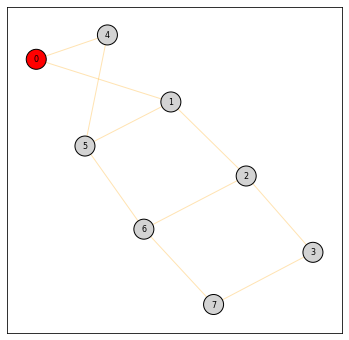

<IPython.core.display.HTML object>

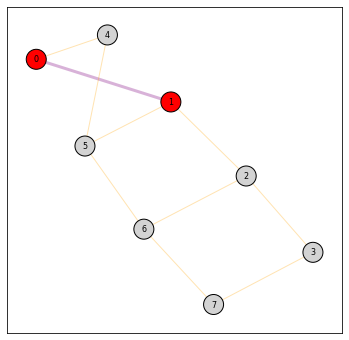

<IPython.core.display.HTML object>

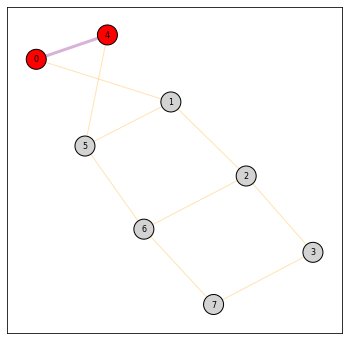

<IPython.core.display.HTML object>

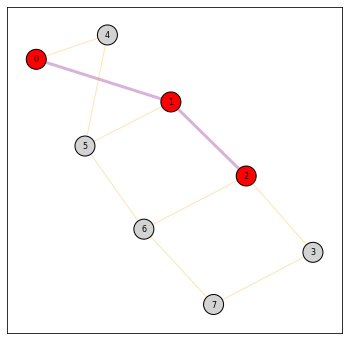

<IPython.core.display.HTML object>

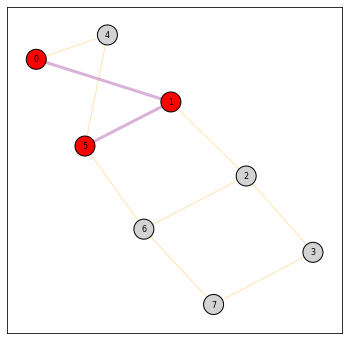

<IPython.core.display.HTML object>

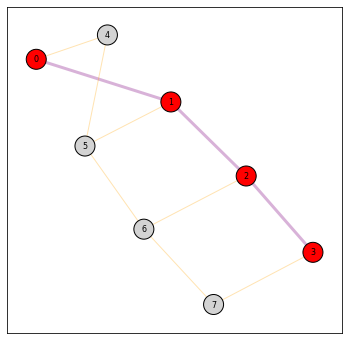

<IPython.core.display.HTML object>

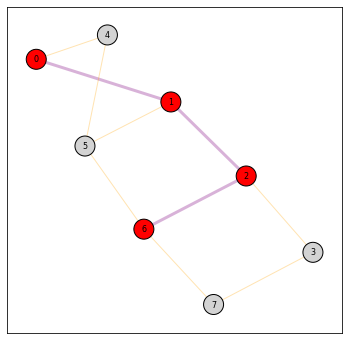

<IPython.core.display.HTML object>

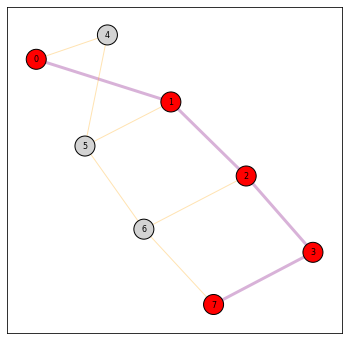

<IPython.core.display.HTML object>

[0, 1, 4, 2, 5, 3, 6, 7]


In [6]:
from queue import LifoQueue as stack
from queue import SimpleQueue as queue

import networkx as nx
import pylab as plt
from IPython.core.display import HTML, display

# import pygraphviz
# from networkx.drawing.nx_agraph import graphviz_layout


def bfs_seq(input_graph, start_id):
    """
     Get a bfs node sequence.

    :param input_graph:
    :param start_id:
    :return:
    """
    dictionary = dict(nx.bfs_successors(input_graph, start_id))
    start = [start_id]
    output = [start_id]

    while len(start) > 0:
        frontier = []
        while len(start) > 0:
            current = start.pop(0)
            neighbor = dictionary.get(current)
            if neighbor is not None:
                frontier = frontier + neighbor
        output = output + frontier
        start = frontier
    return output


def gc(qe):
    if not qe.empty():
        while not qe.empty():
            qe.get()


def bdfs(graph : nx.classes.graph.Graph, start, goal, search='dfs'):
    """
    This is a template. Taking fringe = stack() gives DFS and
    fringe = queue() gives BFS. We need to add a priority function to get UCS.

    Usage: bp = bdfs(graph, start, goal, queue_or_stack = stack()) (this is dfs)
           bp = bdfs(graph, start, goal, queue_or_stack = queue()) (this is bfs)
    """
    depth = {}
    if search == 'dfs':
        queue_or_stack = stack()
        weight = -1
    else:
        queue_or_stack = queue()
        weight = 1

    gc(queue_or_stack)
    current = start
    closed = set()
    back_pointer = {}
    depth[start] = 0
    queue_or_stack.put(current)

    while True:
        if queue_or_stack.empty():
            return None
        while True:
            current = queue_or_stack.get()
            if current not in closed:
                break
            if queue_or_stack.empty():
                return None

        closed.add(current)
        if current == goal:
            return back_pointer

        if graph[current]:
            for node in graph[current]:
                if node not in closed:
                    node_depth = depth[current] + weight
                    if node not in depth or node_depth < depth[node]:
                        back_pointer[node] = current
                        depth[node] = node_depth
                    queue_or_stack.put(node)


def dfs(graph : nx.classes.graph.Graph, start, goal):
    return bdfs(graph, start, goal, search='dfs')


def bfs(graph : nx.classes.graph.Graph, start, goal):
    return bdfs(graph, start, goal, search='bfs')


def get_gr(digraph=True):
    if digraph:
        return nx.DiGraph()
    else:
        return nx.Graph()


def adj2graph(graph : nx.classes.graph.Graph, digraph=True):
    """
    for list representation of adj
    """
    gr = get_gr(digraph=digraph)
    for node in graph:
        gr.add_node(node)
        if graph[node]:
            for adj in graph[node]:
                gr.add_edge(node, adj)
                gr[node][adj]['weight'] = graph[node][adj]
    return gr


def edges_color(graph : nx.classes.graph.Graph, bfs_edge):
    """
    Return edge color and edge weight for a bfs path
    """
    edge_col = ['purple' if e in bfs_edge else 'blue' if e in bfs_edge else 'orange' for e in graph.edges()]
    edge_width = [3 if e in bfs_edge else 1 for e in graph.edges()]
    return edge_col, edge_width


def show_graph(graph : nx.classes.graph.Graph, start: int, goal: int, node_labels='default',
               node_pos='neato', plot_size=(14, 14), file_name=None, is_digraph=True):
    """
    node_labels label to use: 'default', 'none', or a list of labels to use.
    file_name -  a file nama 'my_graph.png'
    """
    fig, ax = plt.subplots(figsize=plot_size)
    Gr = g

    if node_pos == 'project_layout':
        node_pos = dict(zip(Gr.nodes(), [(b, 9 - a) for a, b in Gr.nodes()]))
    else:
        node_pos = nx.nx_pydot.graphviz_layout(Gr, prog=node_pos, root=start)

    edge_weight = nx.get_edge_attributes(Gr, 'weight')

    def path_edges(_path):
        """
        @param _path:
        @return:
        """
        edges = list(zip(_path[:-1], _path[1:]))
        # print(type(Gr[z[0]][z[1])
        # cost = sum([Gr[z[0]][z[1]]['weight'] for z in edges])
        if not is_digraph:
            edges += list(zip(_path[1:], _path[:-1]))
        return edges, 1

    bfs_path = getPath(bdfs(graph, start, goal, search='bfs'), start, goal)
    bfs_edge, bfs_cost = path_edges(bfs_path)

    node_col = ['red' if node in bfs_path else 'lightgray' for node in Gr.nodes()]

    if node_labels == 'default':
        nodes = nx.draw_networkx_nodes(Gr, node_pos, ax=ax, node_color=node_col, node_size=400)
        nodes.set_edgecolor('k')
        nx.draw_networkx_labels(Gr, node_pos, ax=ax, font_size=8)
    elif node_labels == 'none':
        nodes = nx.draw_networkx_nodes(Gr, node_pos, ax=ax, node_color=node_col, node_size=50)
    else:
        # labels must be a list
        nodes = nx.draw_networkx_nodes(Gr, node_pos, ax=ax, node_color=node_col, node_size=400)
        nodes.set_edgecolor('k')
        mapping = dict(zip(Gr.nodes, node_labels))
        nx.draw_networkx_labels(Gr, node_pos, labels=mapping, ax=ax, font_size=8)

    edge_col, edge_width = edges_color(Gr, bfs_edge)

    if is_digraph:
        nx.draw_networkx_edge_labels(Gr, node_pos, ax=ax, label_pos=0.3, edge_labels=edge_weight)
    else:
        nx.draw_networkx_edge_labels(Gr, node_pos, ax=ax, edge_labels=edge_weight)
    nx.draw_networkx_edges(Gr, node_pos, ax=ax, edge_color=edge_col, width=edge_width, alpha=.3)

    if file_name:
        plt.savefig(file_name)

    plt.show()
    display(HTML())


def getPath(bp, start: int, goal : int):
    """
    @param bp: back pointer
    @param start:
    @param goal:
    @return:
    """
    current = goal
    s = [current]
    while current != start:
        current = bp[current]
        s += [current]
    return list(reversed(s))


# create test graph
g = nx.ladder_graph(4)
# get ordered at level bfs
paths = bfs_seq(g, 0)
# display each step
for path in paths:
    show_graph(g, 0, path, plot_size=(6, 6))
# ladder_graph(n)
print(paths)

### Trainer configuration

In [11]:
trainer_config ="""
train: True                 # train or not,  default is True for generation we only need load pre-trained model
active: 'grid_small'        # dataset set generated.
use_model: 'GraphGruRnn'    # model to use , it must be defined in models section.
draw_prediction: True       # at the of training draw.  (TODO here now it will draw last epocs)
load_model: True            # load model or not, and what
load_epoch: 500             # load model.  last epoch
save_model: True            # save model,
regenerate: True            # regenerated,  factor when indicated by epochs_save
active_setting: mini        # indicate what setting to use, so we can switch from debug to production
evaluate: True

early_stopping:
  monitor: loss
  min_delta:
  patience: 100
  mode: max

settings:
  # debug mode
  debug:
    epochs_log:  1000
    start_test:  10
    epochs_test: 10
    epochs_save: 10
  # baseline
  mini:
    # if we need enable early stopping
    early_stopping: True
    epochs_log: 1000
    start_test: 10
    epochs_test: 10
    epochs_save: 50
  # baseline
  baseline:
    early_stopping: True
    epochs_log:  1000
    start_test:  100
    epochs_test: 100
    epochs_save: 100

debug:
  # debug graph generation
  graph_generator: True
  # benchmark dataset loader and sampler, if it true it will return after benchmark
  benchmark_read: False
  # debug model creation
  model_creation: False
  # debug training loops
  train_verbose:  False
  # trace early stopping
  trace_early:    False

training:
  train_ratio: 0.8
  test_ration: 0.8
  validation_ratio: 0.2     # validation ration
  num_workers: 1            # num workers to load data, default 4
  batch_ratio: 32           # num  batches of samples per each epoch, 1 epoch = n batches
  sample_time: 1            # default num sample, note each dataset can overwrite

optimizers:
  node_optimizer:
    eps: 1e-8
    weight_decay: 0
    amsgrad: False
    momentum=0:
    betas: [0.9, 0.999]
    type: Adam
  edge_optimizer:
    eps: 1e-8
    weight_decay: 0
    amsgrad: False
    momentum=0:
    betas: [ 0.9, 0.999 ]
    type: Adam

# lr_schedulers definition
lr_schedulers:
    - type: multistep
      milestones: [ 400, 1000 ]
      name: main_lr_scheduler
    - type: secondary
      milestones: [ 400, 1000 ]
      name: secondary

# Model definition
models:
  # this pure model specific, single model can describe both edges and nodes
  # in case we need use single model for edge and node prediction task ,
  # use keyword single_model: model_name
  GraphGruRnn:
    node_model:
      model: GraphGRU
      optimizer: node_optimizer
      lr_scheduler: main_lr_scheduler
      has_input: True
      has_output: True
    edge_model:
      model: GraphGRU
      optimizer: edge_optimizer
      lr_scheduler: main_lr_scheduler
      input_size: 1
  GraphLstmRnn:
    node_model:
      model: GraphLSTM
      optimizer: node_optimizer
      lr_scheduler: main_lr_scheduler
      has_input: True
      has_output: True
    edge_model:
      model: GraphLSTM
      optimizer: edge_optimizer
      lr_scheduler: main_lr_scheduler
      input_size: 1

plots:
  limit: 100

metrics:
  degree: True
  orbits: True
  clustering: True

trace_prediction_timer: True
trace_training_timer: True
trace_epocs: 1

graph:
   # multiplied (640x10 and 15x32)

  # Generated Grid
  grid:
    # https://networkx.org/documentation/stable/reference/generated/networkx.generators.lattice.grid_2d_graph.html
    epochs: 100
    parameter_shrink: 1
    batch_size: 32
    test_batch_size: 32
    test_total_size: 1000
    num_layers: 4
    lr: 0.003
    milestones: [ 400, 1000 ]
    lr_rate: 0.3
    graph_spec:
      grid_n: [ 10, 20 ]
      grid_m: [ 10, 20 ]
    max_num_node: 0
    max_prev_node: 40
  # just to test code logic
  grid_min:
    epochs: 100
    parameter_shrink: 2
    batch_size: 32
    test_batch_size: 32
    test_total_size: 1000
    num_layers: 4
    lr: 0.003
    milestones: [ 400, 1000 ]
    lr_rate: 0.3
    graph_spec:
      grid_n: [ 2, 5 ]
      grid_m: [ 2, 6 ]
    #    max_num_node: 10
    max_prev_node: 15
  grid_small:
    epochs: 500
    parameter_shrink: 2
    batch_size: 32
    test_batch_size: 32
    test_total_size: 1000
    num_layers: 4
    lr: 0.003
    milestones: [ 400, 1000 ]
    lr_rate: 0.3
    graph_spec:
      grid_n: [ 2, 5 ]
      grid_m: [ 2, 6 ]
#    max_num_node: 10
    max_prev_node: 15
  # Generated Community
  caveman:
    epochs: 20
    parameter_shrink: 1
    batch_size: 32
    test_batch_size: 32
    test_total_size: 1000
    num_layers: 4
    lr: 0.003
    milestones: [ 400, 1000 ]
    lr_rate: 0.3
    graph_spec:
      size_of_cliques: 10
      num_of_cliques_i: [ 2, 3 ]
      num_of_cliques_j: [ 30, 81 ]
      p_edge: 0.8
    # max number num nodes
    max_num_node: 100
    # max nodes
    max_prev_node: 100
  # small caveman community network.
  # check networkx doc for details
  caveman_small:
    epochs: 20
    num_layers: 4
    parameter_shrink: 2
    test_batch_size: 32
    test_total_size: 1000
    batch_size: 32
    milestones: [ 400, 1000 ]
    lr: 0.003
    lr_rate: 0.3
    # graph specs
    graph_spec:
      size_of_cliques: 20
      num_of_cliques_i: [2, 3]
      num_of_cliques_j: [6, 11]
      p_edge: 0.3
      # max number num nodes
    max_num_node: 20
    # max nodes
    max_prev_node: 20

root_dir: "."
log_dir: "logs"
nil_dir: "timing"
graph_dir: "graphs"
results_dir: "results"
timing_dir: "timing"
figures_dir: "figures"
prediction_dir: "prediction"                     # where we save prediction
model_save_dir: "model_save"                     # where we save model
#figures_prediction_dir: "prediction_figures"    #
"""

Let's create model trainer class


In [ ]:
!ls shapegnet/
!pip install ipykernel
!pip install ipython
!pip install ipykernel
!pip install tornado
!pip install prompt-toolkit 
!pip install pyzmq
!git pull
!python main.py

In [ ]:
# this is pyemd requirmnets
!apt-get install -y python3-dev
!apt-get install -y python3.8-dev
!apt-get install -y libpython3.8-dev
!pip install docutils
!pip install pygments
!pip install twine
!pip install wheel
!pip install pyemd
!pip install rich
!pip install python-louvain
# widges fix
!pip install tqdm
!pip install ipywidgets 
#!jupyter nbextension enable --py widgetsnbextension
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!pip install PyYAML

In [12]:
import io
from typing import Dict, List, Set, Tuple
from shapegnet import create_graphs
from shapegnet.external.graphrnn_eval.stats import degree_stats, clustering_stats, orbit_stats_all
from shapegnet.generator_trainer import GeneratorTrainer
from shapegnet.model_config import ModelSpecs
from shapegnet.models.adjacency_decoder import AdjacencyDecoder
from shapegnet.models.sampler.GraphSeqSampler import GraphSeqSampler
from shapegnet.plotlib import plot
from shapegnet.plotlib.plot import draw_single_graph
from shapegnet.utils import fmt_print, fmtl_print
trainer_spec = ModelSpecs(template_file_name=io.StringIO(trainer_config), verbose=True)

Device:                          cuda
Reading from io buffer


Let define main traning loop

In [19]:
import sys
from shapegnet.models.sampler.GraphSeqSampler import GraphSeqSampler
import argparse
import random
import sys
import time
from datetime import time
from datetime import timedelta
#from typing import Final

import numpy as np
import torch
import torch.utils as tutil
import pandas as pd

from shapegnet import create_graphs
from shapegnet.external.graphrnn_eval.stats import degree_stats, clustering_stats, orbit_stats_all
from shapegnet.generator_trainer import GeneratorTrainer
from shapegnet.model_config import ModelSpecs
from shapegnet.model_creator import ModelCreator
from shapegnet.models.adjacency_decoder import AdjacencyDecoder
from shapegnet.models.sampler.GraphSeqSampler import GraphSeqSampler
from shapegnet.plotlib import plot
from shapegnet.plotlib.plot import draw_single_graph
from shapegnet.utils import fmt_print, fmtl_print
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


TRAIN = 1
TEST = 2
PREDICTION = 3

def generate_train_test(g, specs: ModelSpecs, is_fix_seed=True, is_shuffled=True):
    """
    Generate test , train , validation split
    """
    # split datasets
    if is_fix_seed:
        random.seed(123)

    if is_shuffled:
        random.shuffle(g)

    graphs_len = len(g)
    return g[int(specs.test_ratio() * graphs_len):], \
           g[0:int(specs.train_ratio() * graphs_len)], \
           g[0:int(specs.validation_ratio() * graphs_len)]

def compute_graph_split_len(gv, gt):
    """
    Compute split based on number of nodes and edges

    and return normalized value.
    @param gv:
    @param gt:
    @return:
    """

    return sum(g.number_of_nodes() for g in gv) / len(gv), \
           sum(g.number_of_nodes() for g in gt) / len(gt)

def draw_samples(trainer_spec: ModelSpecs, from_epoch=None, limit=None, graph_type=TRAIN,
                 num_samples=10):
    """

     Reads spool dir for generated sample and plot each.

    """
    fmtl_print("Train graph", trainer_spec.get_active_train_graph())
    fmtl_print("Train graph spec", trainer_spec.get_active_train_graph_spec())
    fmtl_print("Prediction files", trainer_spec.get_active_model_prediction_files())
    fmtl_print("Last saved epoch", trainer_spec.get_last_saved_epoc())
    fmtl_print("Last graph stat", trainer_spec.get_last_graph_stat())

    last_saved_epoch = trainer_spec.get_last_saved_epoc()['node_model']
    graphs = trainer_spec.get_last_graph_stat()

    for i, g in enumerate(graphs):
        file_name = trainer_spec.generate_prediction_figure_name(last_saved_epoch, sample_time=1, gid=i)
        draw_single_graph(g, file_name=file_name, plot_type='prediction', graph_name="test")

def prepare(trainer_spec : ModelSpecs):
    """
    Prepare dir , clean up etc.
    """
    trainer_spec.build_dir()
    trainer_spec.setup_tensorflow()


def create_dataset_sampler(trainer_spec: ModelSpecs, graphs, num_workers=None):
    """

    @param trainer_spec: trainer specification, include strategy how to sample ration etc.
    @param graphs: a graph that we use to train network
    @param num_workers:
    @return: return torch.util.data.DataLoader
    """
    # dataset initialization
    if trainer_spec.max_prev_node() > 0:
        dataset = GraphSeqSampler(graphs,
                                  max_prev_node=trainer_spec.max_prev_node(),
                                  max_num_node=trainer_spec.max_num_node())
    else:
        dataset = GraphSeqSampler(graphs)

    normalized_weight = [1.0 / len(dataset) for i in range(len(dataset))]
    sample_strategy = tutil.data.sampler.WeightedRandomSampler(normalized_weight,
                                                               num_samples=trainer_spec.compute_num_samples(),
                                                               replacement=True)

    _num_workers = trainer_spec.num_workers()
    if num_workers is not None:
        _num_workers = num_workers

    dataset_loader = tutil.data.DataLoader(dataset,
                                           batch_size=trainer_spec.batch_size(),
                                           num_workers=_num_workers,
                                           sampler=sample_strategy,
                                           pin_memory=False)

    return dataset_loader


def clean_graphs(graph_real, graph_pred, is_shuffle=True):
    """
    Selecting graphs generated that have the similar sizes.
    It is usually necessary for GraphRNN-S version, but not the full GraphRNN model.
    """

    #
    if is_shuffle:
        random.shuffle(graph_real)
        random.shuffle(graph_pred)

    # get length
    real_graph_len = np.array([len(graph_real[i]) for i in range(len(graph_real))])
    pred_graph_len = np.array([len(graph_pred[i]) for i in range(len(graph_pred))])

    fmt_print("Real graph size", real_graph_len)
    fmt_print("Prediction graph size", pred_graph_len)

    # # select pred samples
    # # The number of nodes are sampled from the similar distribution as the training set
    # pred_graph_new = []
    # pred_graph_len_new = []
    # for value in real_graph_len:
    #     pred_idx = find_nearest_idx(pred_graph_len, value)
    #     pred_graph_new.append(graph_pred[pred_idx])
    #     pred_graph_len_new.append(pred_graph_len[pred_idx])
    # return graph_real, pred_graph_new


def compute_generic_stats(epoch_predicted):
    """

    """
    graph_pred_aver = 0
    for graph in epoch_predicted:
        graph_pred_aver += graph.number_of_nodes()

    graph_pred_aver /= len(epoch_predicted)
    fmt_print('Prediction average number of nodes', graph_pred_aver)


def evaluate(cmds, trainer_spec: ModelSpecs,
             epoch_start=1,
             epoch_step=1):
    # get a graphs
    try:
        train_graph, graph_in_test = trainer_spec.load_train_test()
        graph_test_len = len(train_graph)
    except FileNotFoundError:
        print("No graph file found.")
        return

    graph_train = train_graph[0:int(0.8 * graph_test_len)]  # train
    # graph_validate = train_graph[0:int(0.2 * graph_test_len)]  # validate
    # graph_test = train_graph[int(0.8 * graph_test_len):]       # test on a hold out test set

    graph_test_aver = 0
    for graph in graph_in_test:
        graph_test_aver += graph.number_of_nodes()

    graph_test_aver /= len(graph_in_test)

    print('test average len', graph_test_aver)
    predictions = trainer_spec.get_prediction_graph()

    # x_df = pd.DataFrame(x_np)

    # x_np = x.numpy()
    for i, (file_name, epoch_predicted) in enumerate(predictions):
        if i < 27:
            continue

        print(i, file_name)
        print("Computing statistic for", file_name)
        # get filename
        # fname_pred = trainer_spec.prediction_filename(epoch, sample_time)
        # graph_pred = load_graph_from_file(fname_pred, is_real=False)
        #
        # clean graphs
        # if is_clean:
        #     graph_test, graph_pred = clean_graphs(graph_test, graph_pred)
        # else:
        #     shuffle(graph_pred)
        #     graph_pred = graph_pred[0:len(graph_test)]
        #
        fmt_print('Graph in test:', len(graph_in_test))
        fmt_print('Graph in prediction:', len(epoch_predicted))

        #
        compute_generic_stats(epoch_predicted)
        clean_graphs(graph_in_test, epoch_predicted)

        #
        # # evaluate MMD test
        mmd_degree = -1
        if trainer_spec.mmd_degree():
            mmd_degree = degree_stats(graph_in_test, epoch_predicted)
            fmt_print('Evaluated MMD:', mmd_degree)
        #
        mmd_clustering = -1
        if trainer_spec.mmd_clustering():
            mmd_clustering = clustering_stats(graph_in_test, epoch_predicted)
            fmt_print('Graph clustering:', mmd_clustering)
        #
        mmd_4orbits = -1
        if trainer_spec.mmd_orbits():
            mmd_orbits = orbit_stats_all(graph_in_test, epoch_predicted)
            fmt_print('Graph orbit:', mmd_4orbits)

        # x_np = [i] = [mmd_degree, mmd_clustering, mmd_orbits]
        print('degree', mmd_degree, 'clustering', mmd_clustering, 'orbits', mmd_4orbits)

    # x_df.to_csv('tmp.csv')


def main_train(cmds, trainer_spec: ModelSpecs):
    """

    """
    # prepare test environment
    prepare(trainer_spec)

    # create model creator
    model_creator = ModelCreator(trainer_spec, device)

    # model graph specs
    print("###############################################")
    fmtl_print("Creating graphs type", trainer_spec.active)
    fmtl_print("Maximum previous node to track", trainer_spec.max_prev_node())
    fmtl_print("Maximum nodes to track", trainer_spec.max_num_node())

    # create dataset based on specs in config.yaml
    graph_spec = trainer_spec.max_prev_node()
    graphs = create_graphs.create(trainer_spec)
    max_num_node = max([graphs[i].number_of_nodes() for i in range(len(graphs))])
    min_num_edge = min([graphs[i].number_of_edges() for i in range(len(graphs))])
    max_num_edge = max([graphs[i].number_of_edges() for i in range(len(graphs))])

    trainer_spec.trainer_spec = trainer_spec.set_max_num_node(max_num_node)
    #
    fmtl_print('traing/test/val ratio', trainer_spec.train_ratio(),
               trainer_spec.test_ratio(), trainer_spec.validation_ratio())
    fmtl_print('max previous node', trainer_spec.max_prev_node())
    fmtl_print('max number node', trainer_spec.max_num_node())
    fmtl_print('max/min number edge', max_num_edge, min_num_edge)

    # compute splits
    graphs_test, graphs_train, graphs_validate = generate_train_test(graphs, trainer_spec)
    graph_validate_len, graph_test_len = compute_graph_split_len(graphs_validate, graphs_test)
    fmtl_print('total/train/test/validate sizes', len(graphs), len(graphs_train), len(graphs_test),
               len(graphs_validate))
    fmtl_print('validation/test', graph_validate_len, graph_test_len)
    fmtl_print('total graph number, training subset', len(graphs), len(graphs_train))
    print("###############################################")

    # load_pretrained(trainer_spec)
    # save ground truth graphs
    # To get train and test set, after loading you need to manually slice
    GeneratorTrainer.save_graphs(graphs, str(trainer_spec.train_graph_file()))
    GeneratorTrainer.save_graphs(graphs, str(trainer_spec.test_graph_file()))

    # plot training set if needed
    if cmds is not None and cmds.plot == 'train':
        plot.draw_samples_from_file(trainer_spec.train_graph_file(), plot_type='train',
                                    file_prefix=trainer_spec.train_plot_filename(),
                                    num_samples=10)

    dataset_loader = create_dataset_sampler(trainer_spec, graphs_train)

    if trainer_spec.is_read_benchmark():
        read_start_timer = time.monotonic()
        for _, _ in enumerate(dataset_loader):
            pass
        read_stop_timer = time.monotonic()
        fmt_print("Dataset read time", timedelta(seconds=read_stop_timer - read_start_timer), "sec")
        return

    models = model_creator.create_model(verbose=True)
    if trainer_spec.is_train_network():
        decoder = AdjacencyDecoder()
        trainer = model_creator.create_trainer(dataset_loader, models, decoder)
        trainer.train()


def main_trainer(trainer_spec: ModelSpecs):
    """
    Main entry
    @param cmds:
    @param trainer_spec:
    @return:
    """

    if trainer_spec.is_train_network():
        main_train(None, trainer_spec)

    if trainer_spec.is_draw_samples():
        if not trainer_spec.is_trainer():
            sys.exit("Check configuration file,  it looks like model {} "
                     "is untrained.".format(trainer_spec.get_active_model()))
        draw_samples(trainer_spec)

    if trainer_spec.is_evaluate():
        if not trainer_spec.is_trainer():
            sys.exit("Check configuration file,  it looks like model {} "
                     "is untrained.".format(trainer_spec.get_active_model))
        evaluate(None, trainer_spec)

In [ ]:
trainer_spec = ModelSpecs(template_file_name=io.StringIO(trainer_config), verbose=True)
model_specs = trainer_spec.get_active_model_spec()
model_specs

fmtl_print("Torch cudnn backend version: ", torch.backends.cudnn.version())
fmtl_print("Model in training mode", trainer_spec.is_train_network())
fmtl_print("Model in evaluate mode", trainer_spec.is_evaluate())
fmtl_print("Model in generate sample", trainer_spec.is_draw_samples())
fmtl_print("Model active dataset", trainer_spec.active)
fmtl_print("Model active dataset", trainer_spec.epochs())
fmtl_print("Model active dataset", trainer_spec.batch_size())
fmtl_print("Model number of layers", trainer_spec.num_layers())
fmtl_print("Active model", trainer_spec.active_model)

# run
main_trainer(trainer_spec)

Device:                          cuda
Reading from io buffer
Torch cudnn backend version: :   8005
Model in training mode:          True
Model in evaluate mode:          True
Model in generate sample:        True
Model active dataset:            grid_small
Model active dataset:            500
Model active dataset:            32
Model number of layers:          4
Active model:                    GraphGruRnn
tensorboard log dir:      logs
###############################################
Creating graphs type:            grid_small
Maximum previous node to track:  15
Maximum nodes to track:          0
Generating grid graph type: backend nx
Synthetic grid's n and m: ([2, 5], [2, 6])
traing/test/val ratio:           (0.8, 0.8, 0.2)
max previous node:               15
max number node:                 20
max/min number edge:             (31, 4)
total/train/test/validate sizes: (12, 9, 3, 2)
validation/test:                 (12.0, 5.333333333333333)
total graph number, training subset: (12, 9)
#

  0%|          | 0/500 [00:00<?, ?it/s]

Saving graph image, type training to tensorboard
Saving graph to a file :  results/prediction/grid_small_GraphGruRnn__layers_4_hidden_64_predictions_epoch_10_sample_1.dat
Saving graph image, type training to tensorboard
Saving graph to a file :  results/prediction/grid_small_GraphGruRnn__layers_4_hidden_64_predictions_epoch_10_sample_2.dat
Saving graph image, type training to tensorboard
Saving graph to a file :  results/prediction/grid_small_GraphGruRnn__layers_4_hidden_64_predictions_epoch_10_sample_3.dat
Saving graph image, type training to tensorboard
Saving graph to a file :  results/prediction/grid_small_GraphGruRnn__layers_4_hidden_64_predictions_epoch_20_sample_1.dat
Saving graph image, type training to tensorboard
Saving graph to a file :  results/prediction/grid_small_GraphGruRnn__layers_4_hidden_64_predictions_epoch_20_sample_2.dat
Saving graph image, type training to tensorboard
Saving graph to a file :  results/prediction/grid_small_GraphGruRnn__layers_4_hidden_64_predicti